K-Means: crea K grupos a partir de un conjunto de observaciones, los elementos deben tener similitudes.

¿Cómo funciona? 

* 1) Seleccionar un valor para K (centroides)
* 2) Asignamos cada uno de los elementos restantes al centro más cercano.
* 3) Asignamos cada punto a su centroide más cercano.
* 4) Repetimos paso 2 y 3 hasta que los centros no se modifiquen.

¿Cómo puedo saber cuantos centroides necesito? Regularmente este método es a prueba y error, lo importante es que tengas un nivel de precisión cercano a 100. 

Si no quieres hacer a prueba y error existe el método de codo entre los más conocidos:

* Calcula el agrupamiento para diferentes de K.
* El error al cuadrado para cada punto es el cuadrado de la distancia del punto desde su centro.
* el xy rompe los demás puntos, ahí indica que es el n K que debemos agregar al algoritmo.

In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt



iris = datasets.load_iris()

In [4]:
X_iris = iris.data
Y_iris = iris.target

In [5]:
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])

In [9]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


Text(0, 0.5, 'Petal Width')

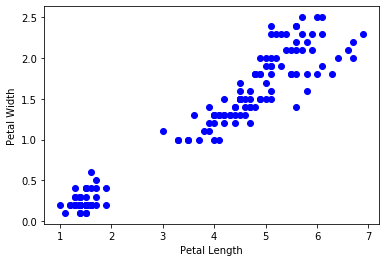

In [13]:
#Ploteamos petalo. Visualmente encontramos dos grupos grandes 

plt.scatter(x['Petal Length'], x['Petal Width'], c='blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

Text(0, 0.5, 'Sepal Width')

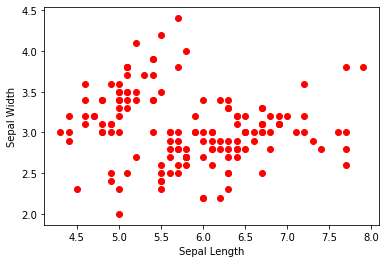

In [16]:
#Ploteamos sepalo

plt.scatter(x['Sepal Length'], x['Sepal Width'], c='red')
plt.xlabel('Sepal Length', fontsize = 10)
plt.ylabel('Sepal Width', fontsize = 10)

In [18]:
model = KMeans(n_clusters = 2, max_iter= 1000)

model.fit(x)
y_labels = model.labels_  #obtenemos nuestras etiquetas basadas en la similitud

In [20]:
#Vamos a hacer la predicción de Y

y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Cada uno de estos valores son los dos grupos encontrados, está relacionado a cada uno de los puntos del gráfico de arriba.

In [22]:
#Vamos a buscar la precisión del modelo

from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.5399218294207123


Nos da 53%, no es un buen modelo. Vamos a cambiar la cantidad (K) de centroides

In [30]:
model = KMeans(n_clusters = 3, max_iter= 1000)

model.fit(x)
y_labels = model.labels_

In [31]:
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [32]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


Nos da 73%, mejoró mucho el modelo. De nuevo vamos a cambiar la cantidad (K) de centroides

In [26]:
model = KMeans(n_clusters = 4, max_iter= 1000)

model.fit(x)
y_labels = model.labels_

In [27]:
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 0 0 0 0 3 0 0 0 2
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 2
 0 2]


In [28]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.6498176853819967


Nos dió 64%, no nos sirve porque es menor al anterior. Es decir, encontramos el número de centroides y es justamente 3 (73%), que es el más cercano a 100% 

Text(0, 0.5, 'Petal Width')

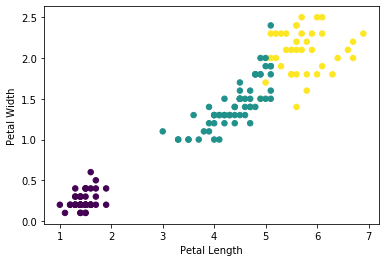

In [33]:
#Vamos a gráficar el modelo

plt.scatter(x['Petal Length'], x['Petal Width'], c= y_kmeans, s=30) #s tamaño de nuestros puntos
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)